In [6]:
!pip install -r ./EDA/data/requirements.txt

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score, roc_curve,    precision_recall_curve, f1_score, precision_score, recall_score


In [8]:
seed = 42
np.random.seed(seed)

Load the data

In [9]:
X_train =  np.load("./artifacts/X_train_resampled.npz", allow_pickle=True)['arr_0']
y_train =  np.load("./artifacts/y_train_resampled.npz", allow_pickle=True)['arr_0']
X_test =  np.load("./artifacts/X_test.npz", allow_pickle=True)['arr_0']
y_test =  np.load("./artifacts/y_test.npz", allow_pickle=True)['arr_0']

In [10]:
X_train

array([[-0.6781931942189472, 0.3413519501232164, -1.2258476714090278,
        ..., False, False, True],
       [0.3029709677009129, -0.3502038645510472, 0.6913888112717486, ...,
        False, False, True],
       [-1.4631245237548354, -0.695981771888179, 0.613101513322822, ...,
        True, False, True],
       ...,
       [0.001042277694673529, -0.9581576516238206, -1.2258476714090278,
        ..., True, True, False],
       [1.7133440474107031, -0.9770151357951831, 0.5588098324379465, ...,
        False, True, False],
       [0.04205977654685911, 1.378685672134612, 0.7224487996527843, ...,
        False, False, True]], shape=(12712, 13), dtype=object)

In [11]:
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [14]:
y_pred = model_lr.predict(X_test)
y_pred_proba = model_lr.predict_proba(X_test)

In [15]:
print(y_pred)
print(y_pred_proba)

[1 0 0 ... 1 0 0]
[[0.34448911 0.65551089]
 [0.87119301 0.12880699]
 [0.50247256 0.49752744]
 ...
 [0.31038647 0.68961353]
 [0.76875668 0.23124332]
 [0.60170874 0.39829126]]


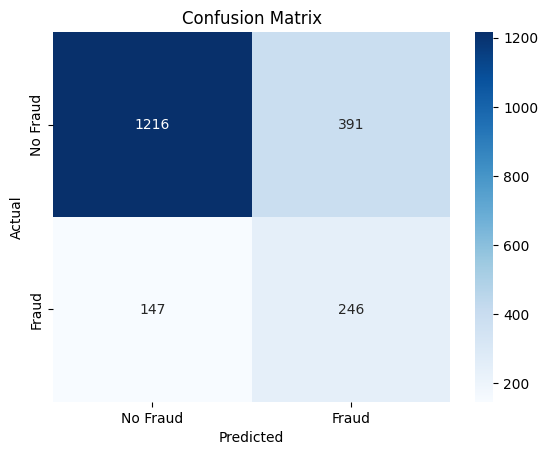

In [ ]:
confusion_matrix_result = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

